In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_excel ('Tips Quick EDA exercise v0.1 (5).xlsx')
print (df)

     total_bill   tip       sex    smoker   day    time  size
0         16.99  1.01    Female        No   Sun  Dinner   2.0
1         10.34  1.66      Male        No   Sun  Dinner   3.0
2         21.01  3.50      Male        No   Sun  Dinner   3.0
3         23.68  3.31      Male        No   Sun  Dinner   2.0
4         24.59  3.61    Female        No   Sun  Dinner   4.0
..          ...   ...       ...       ...   ...     ...   ...
240       27.18  2.00    Female       Yes   Sat  Dinner   2.0
241       22.67  2.00      Male       Yes   Sat  Dinner   2.0
242       17.82  1.75      Male        No   Sat  Dinner   2.0
243       18.78  3.00    Female        No  Thur  Dinner   2.0
244         NaN   NaN  0.356557  0.618852   NaN     NaN   NaN

[245 rows x 7 columns]


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [5]:
df.mean(axis=0)

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [ ]:
#  Question 1:- What is overall average tip

In [6]:
df['tip'].mean()

2.9982786885245902

In [ ]:
# Therefore Overall average tips is approximately 3

In [ ]:
# Ques.2:-  Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [7]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [ ]:
# Thus, mean and median does not have  much difference so we can say that tip field probably doesn't have any outliers


In [ ]:
# Ques:3 Prepare a boxplot for 'tip', are there any outliers?

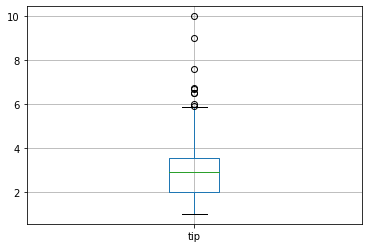

In [8]:
df.boxplot(column=['tip'])

In [9]:
df[df.tip>=8]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3.0
212,48.33,9.0,Male,No,Sat,Dinner,4.0


In [ ]:
# tip field contains Outliers

In [ ]:
# Ques:4 Prepare a boxplot for 'total_bill', are there any outliers?

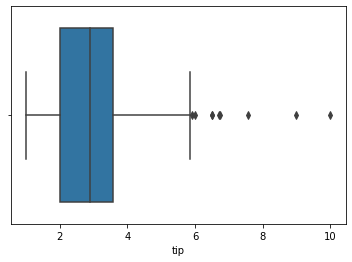

In [10]:
sns.boxplot(x="tip", data=df)

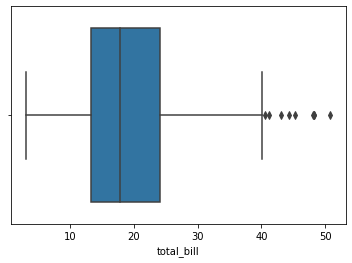

In [11]:
sns.boxplot(x="total_bill", data=df)

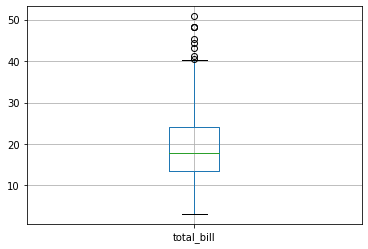

In [12]:
df.boxplot(column=['total_bill'])

In [ ]:
# there are outliers in total_fields

In [ ]:
# Ques:5 Gender: what is the percent of females in the data?

In [13]:
df.sex.value_counts(normalize = True)

Male                   0.640816
Female                 0.355102
0.35655737704918034    0.004082
Name: sex, dtype: float64

In [ ]:
# there are 35.51% of Females

In [ ]:
# ques:6 Prepare a bar plot with the bars representing the percentage of records for each gender

In [14]:
freqs = df.sex.value_counts(normalize = True )
freqs

Male                   0.640816
Female                 0.355102
0.35655737704918034    0.004082
Name: sex, dtype: float64

In [15]:
cnt = df.groupby(['sex']).count().reset_index()
cnt

,sex,total_bill,tip,smoker,day,time,size
0,0.356557,0,0,1,0,0,0
1,Female,87,87,87,87,87,87
2,Male,157,157,157,157,157,157


In [16]:
cnt['count_perc'] = (cnt['total_bill']/ len(df)) *100
cnt

,sex,total_bill,tip,smoker,day,time,size,count_perc
0,0.356557,0,0,1,0,0,0,0.000000
1,Female,87,87,87,87,87,87,35.510204
2,Male,157,157,157,157,157,157,64.081633


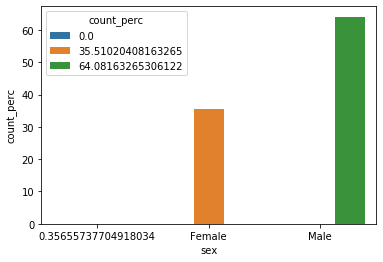

In [17]:
sns.barplot(x="sex",y='count_perc',
            hue = 'count_perc'
            ,data = cnt)

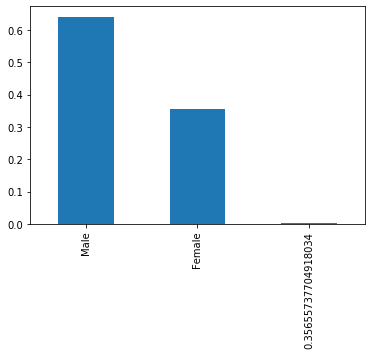

In [18]:
df.sex.value_counts(normalize=True).plot.bar()


In [ ]:
# Ques:7 Does the average tip differ by gender? Does one gender tip more than the other?

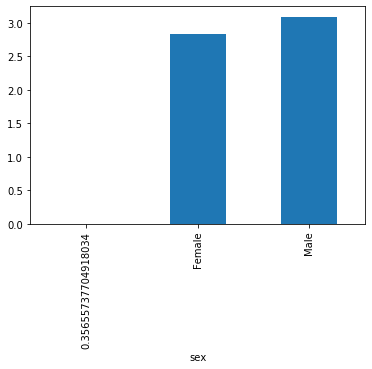

In [19]:
df.groupby(["sex"]).mean()['tip'].plot.bar()

In [ ]:
# Yes, the average tip slightly differs by gender. Male tip slightly more than female

In [ ]:
# Ques:8 Does the average tip differ by the time of day?

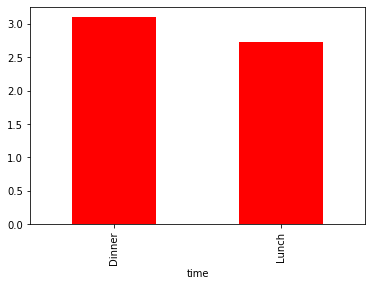

In [21]:
df.groupby(['time'])['tip'].mean().plot.bar(color="red")

In [22]:
df.groupby(["day","time"]).mean()['tip']

day   time  
Fri   Dinner    2.940000
      Lunch     2.382857
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Thur  Dinner    3.000000
      Lunch     2.767705
Name: tip, dtype: float64

In [23]:
df.groupby(["day"]).mean()['tip']

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [24]:
df.groupby(["time"]).mean()['tip']

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

In [ ]:
# Yes,people give more tip during Dinner compared to Lunch


In [ ]:
# Ques:9 Does the average tip differ by size (number of people at the table)? 

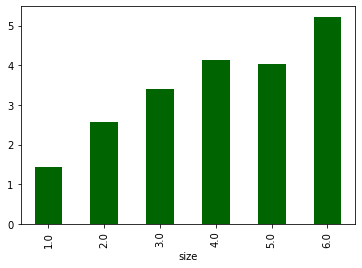

In [25]:
df.groupby(['size'])['tip'].mean().plot.bar(color="darkgreen")

In [26]:
df.groupby('size').mean()['tip']

size
1.0    1.437500
2.0    2.582308
3.0    3.393158
4.0    4.135405
5.0    4.028000
6.0    5.225000
Name: tip, dtype: float64

In [ ]:
#if the number of people are more then the tip will also be increase

In [ ]:
# Ques10: Do smokers tip more than non-smokers?

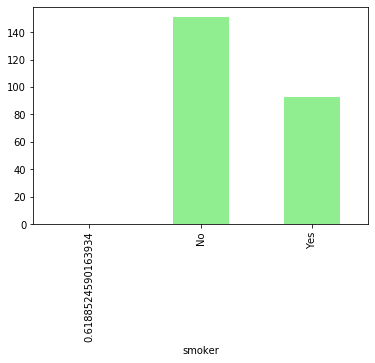

In [27]:
df.groupby(['smoker'])['tip'].count().plot.bar(color="lightgreen")

In [28]:
df.groupby('smoker').sum()['tip']

smoker
0.6188524590163934      0.00
No                    451.77
Yes                   279.81
Name: tip, dtype: float64

In [ ]:
# The smokers Tip is less then NOn- Smokers


In [ ]:
# Ques:11 Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

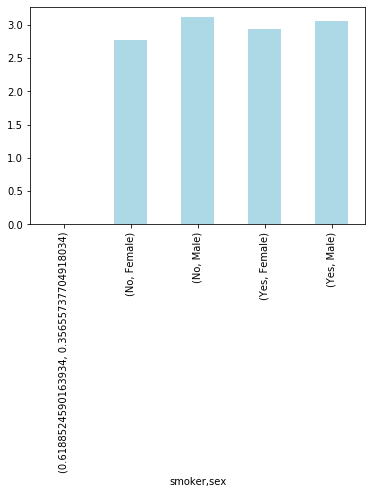

In [29]:
df.groupby(['smoker','sex'])['tip'].mean().plot.bar(color="lightblue")

In [30]:
df.groupby(['sex','smoker']).mean()['tip']

sex                  smoker            
0.35655737704918034  0.6188524590163934         NaN
Female               No                    2.773519
                     Yes                   2.931515
Male                 No                    3.113402
                     Yes                   3.051167
Name: tip, dtype: float64

In [31]:
df.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,0.35655737704918034,Female,Male
smoker,,,
0.6188524590163934,NaN,NaN,NaN
No,NaN,2.773519,3.113402
Yes,NaN,2.931515,3.051167


In [32]:
pd.pivot_table(data=df, index='sex',columns='smoker',values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [33]:
pd.pivot_table(data=df, index='sex',columns='smoker',values='tip',aggfunc=np.median)

smoker,No,Yes
sex,,
Female,2.68,2.88
Male,2.74,3.00


In [35]:
pd.pivot_table(data=df,index='sex',columns='smoker',values='tip',aggfunc= lambda x:np.quantile(x,0.2))

smoker,No,Yes
sex,,
Female,1.752,2.0
Male,2.000,2.0


In [ ]:
# The group with Male and Non-smoker tips the most. Also group with Male and smoker tips slightly less than group with Male non-smoker

In [ ]:
# Ques:12 Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [36]:
df.insert(2,"pct_tip",df.tip/df.total_bill)

In [37]:
df.head()

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2.0
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3.0
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3.0
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2.0
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4.0


In [ ]:
# Ques:13 Does pct_tip differ by gender? Does one gender tip more than the other?

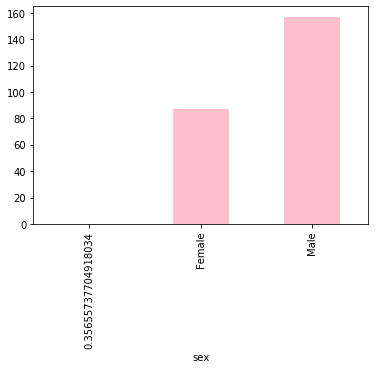

In [39]:
df.groupby(['sex'])['pct_tip'].count().plot.bar(color="pink")

In [40]:
df.groupby(["sex"]).sum()['pct_tip']

sex
0.35655737704918034     0.000000
Female                 14.484694
Male                   24.751136
Name: pct_tip, dtype: float64

In [41]:
pd.pivot_table(data=df, index='sex',columns='smoker',values='pct_tip')

smoker,No,Yes
sex,,
Female,0.156921,0.182150
Male,0.160669,0.152771


In [ ]:
# Yes, the pct_tip differs by gender. Male tip is  more than female tip

In [ ]:
# Ques:14 Does pct_tip differ by size (number of people at the table)?

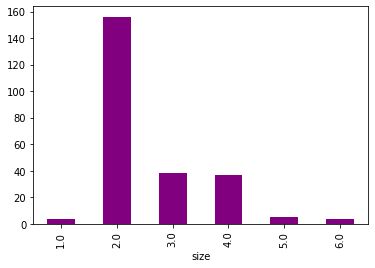

In [42]:
df.groupby(['size'])['pct_tip'].count().plot.bar(color="purple")

In [43]:
df.groupby(["size"]).sum()['pct_tip']

size
1.0     0.869168
2.0    25.852194
3.0     5.781960
4.0     5.400113
5.0     0.707477
6.0     0.624917
Name: pct_tip, dtype: float64

In [ ]:
# Yes, pct_tip do differ by size. The table with size 2 gives maximum pct_tip

In [ ]:
# Ques:15 Make the gender vs. smoker view using pct_tip - does your inference change?

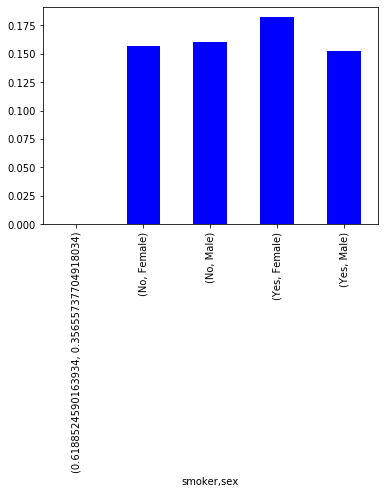

In [44]:
df.groupby(['smoker','sex'])['pct_tip'].mean().plot.bar(color="blue")

In [45]:
df.groupby(['smoker','sex'])['pct_tip'].mean()

smoker              sex                
0.6188524590163934  0.35655737704918034         NaN
No                  Female                 0.156921
                    Male                   0.160669
Yes                 Female                 0.182150
                    Male                   0.152771
Name: pct_tip, dtype: float64

In [ ]:
# Yes, group with Female smoker gives more average pct_tip

In [ ]:
# Ques:16 Make a scatter plot of total_bill vs. tip

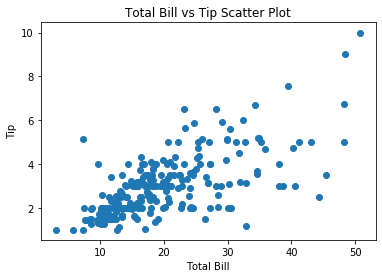

In [48]:
plt.scatter( x='total_bill', y='tip', data = df)
plt.xlabel('Total Bill')              
plt.ylabel('Tip')
plt.title('Total Bill vs Tip Scatter Plot')            
plt.show()

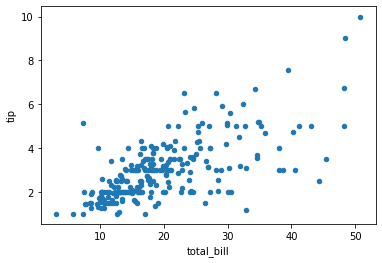

In [49]:
df.plot.scatter(x='total_bill', y='tip')

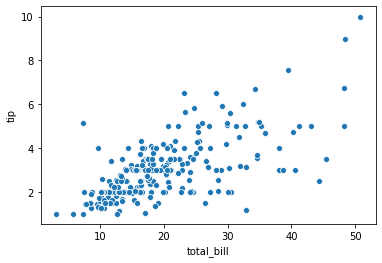

In [50]:
sns.scatterplot(x='total_bill', y='tip', data = df)

In [ ]:
#  Higher the amount of bill, higher the tip value

In [ ]:
# Ques:17 Make a scatter plot of total_bill vs. pct_tip?

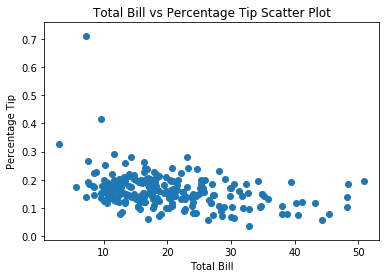

In [52]:
plt.scatter(x='total_bill', y='pct_tip', data = df)
plt.xlabel('Total Bill')              # label = name of label
plt.ylabel('Percentage Tip')
plt.title('Total Bill vs Percentage Tip Scatter Plot')            # title = title of plot
plt.show()

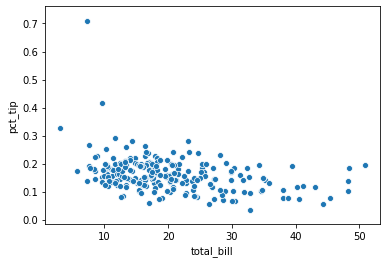

In [53]:
sns.scatterplot(x='total_bill', y='pct_tip', data = df)

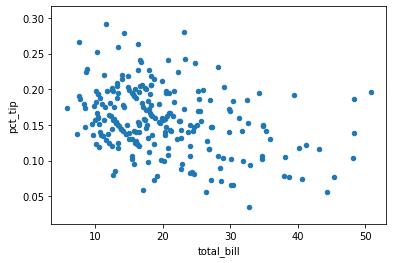

In [54]:
df[df.pct_tip<=0.3].plot.scatter(x='total_bill', y='pct_tip')

In [ ]:
# Thus, higher the amount of bill doesn't make much difference to pct_bill

In [55]:
df.corr()

,total_bill,tip,pct_tip,size
total_bill,1.000000,0.675734,-0.338624,0.598315
tip,0.675734,1.000000,0.342370,0.489299
pct_tip,-0.338624,0.342370,1.000000,-0.142860
size,0.598315,0.489299,-0.142860,1.000000
